# **Problema de los Tres Cuerpos**


## **1. Introducción**

* Objetivo de estudio

* Contexto del problema

* Aplicaciones e interes científico

## **2. Análisis Teórico**

Consideremos tres cuerpos de masas $m_1$, $m_2$ y $m_3$ que interactúan según la ley de gravitación universal de Newton.  

---

### **2.1 Ley de Gravitación Universal y Fuerzas**  
La fuerza gravitacional que ejerce el cuerpo $j $ sobre el cuerpo $i$ es:  

$$\mathbf{F}_{ij} = G \frac{m_i m_j}{r_{ij}^3} \mathbf{r}_{ij},$$

donde:  
- $\mathbf{r}_{ij} = \mathbf{r}_j - \mathbf{r}_i$ (vector de posición relativa),  
- $r_{ij} = \|\mathbf{r}_{ij}\|$ (distancia entre cuerpos $i$ y $j$),  
- $G$ es la constante gravitacional.  

---

### **2.2 Ecuaciones de Movimiento**  
La aceleración del cuerpo $i$ debido a las interacciones con los otros dos cuerpos es:  

$$\frac{d^2 \mathbf{r}_i}{dt^2} = G \left( \frac{m_j (\mathbf{r}_j - \mathbf{r}_i)}{r_{ij}^3} + \frac{m_k (\mathbf{r}_k - \mathbf{r}_i)}{r_{ik}^3} \right).$$

Para los tres cuerpos, el sistema de ecuaciones diferenciales de segundo orden es:  

$$
\begin{cases}
\frac{d^2 \mathbf{r}_1}{dt^2} = G \left( \frac{m_2 (\mathbf{r}_2 - \mathbf{r}_1)}{r_{12}^3} + \frac{m_3 (\mathbf{r}_3 - \mathbf{r}_1)}{r_{13}^3} \right), \\
\frac{d^2 \mathbf{r}_2}{dt^2} = G \left( \frac{m_1 (\mathbf{r}_1 - \mathbf{r}_2)}{r_{12}^3} + \frac{m_3 (\mathbf{r}_3 - \mathbf{r}_2)}{r_{23}^3} \right), \\
\frac{d^2 \mathbf{r}_3}{dt^2} = G \left( \frac{m_1 (\mathbf{r}_1 - \mathbf{r}_3)}{r_{13}^3} + \frac{m_2 (\mathbf{r}_2 - \mathbf{r}_3)}{r_{23}^3} \right).
\end{cases}
$$

---

### **2.3 Reducción a un Sistema de Primer Orden**  
Para resolver numéricamente, transformamos las ecuaciones de segundo orden en un sistema de primer orden.  

Definimos:  
- **Posición**: $\mathbf{r}_i = (x_i, y_i, z_i)$,  
- **Velocidad**: $\mathbf{v}_i = (v_{xi}, v_{yi}, v_{zi})$.  

El sistema de primer orden para cada cuerpo $i$ es:  

$$
\begin{cases}
\frac{d\mathbf{r}_i}{dt} = \mathbf{v}_i, \\
\frac{d\mathbf{v}_i}{dt} = G \left( \frac{m_j (\mathbf{r}_j - \mathbf{r}_i)}{r_{ij}^3} + \frac{m_k (\mathbf{r}_k - \mathbf{r}_i)}{r_{ik}^3} \right).
\end{cases}
$$

En total, hay **18 ecuaciones** (3 cuerpos $\times$ 6 variables cada uno: 3 posiciones + 3 velocidades).  

---

### **2.4 Formulación Adimensional**  
Usando unidades naturales:  
- Longitud: $a$ (distancia característica, e.g., distancia inicial media),  
- Masa: $M$ (masa característica, e.g., $M = m_1 + m_2 + m_3$),  
- Tiempo: $\tau = \sqrt{\frac{a^3}{G M}}$.  

Variables adimensionales:  
$$
\tilde{\mathbf{r}}_i = \frac{\mathbf{r}_i}{a}, \quad \tilde{\mathbf{v}}_i = \frac{\mathbf{v}_i \tau}{a}, \quad \tilde{t} = \frac{t}{\tau}, \quad \tilde{m}_i = \frac{m_i}{M}.
$$

Ecuaciones adimensionales:  
$$
\begin{cases}
\frac{d\tilde{\mathbf{r}}_i}{d\tilde{t}} = \tilde{\mathbf{v}}_i, \\
\frac{d\tilde{\mathbf{v}}_i}{d\tilde{t}} = \sum_{j \neq i} \frac{\tilde{m}_j (\tilde{\mathbf{r}}_j - \tilde{\mathbf{r}}_i)}{\tilde{r}_{ij}^3}.
\end{cases}
$$

---

### **2.5 Conservación de la Energía y Momento Angular**  
La energía total del sistema debe conservarse:  

$$E_{tot} = \sum_{i=1}^3 \frac{1}{2} m_i v_i^2 - G \sum_{i < j} \frac{m_i m_j}{r_{ij}}$$

El momento angular total también se conserva:  

$$\mathbf{L} = \sum_{i=1}^3 m_i \mathbf{r}_i \times \mathbf{v}_i$$

---

Esta formulación proporciona el marco teórico completo para simular el problema de los tres cuerpos mediante integración numérica.

---

## **3. Implementación Numérica**

### **3.1 Método de Runge-Kutta de Cuarto Orden (RK4)**

El método de Runge-Kutta de cuarto orden (RK4) es un esquema de integración numérica utilizado para resolver sistemas de ecuaciones diferenciales ordinarias. En el contexto del problema de los tres cuerpos, este método nos permite calcular de forma precisa la evolución temporal del sistema dinámico dada una condición inicial.

Matemáticamente, RK4 aproxima el estado futuro $y(t + \Delta t)$ mediante una combinación ponderada de derivadas evaluadas en distintos puntos dentro del intervalo de integración. La fórmula general para un sistema de ecuaciones diferenciales de la forma:

$$
\frac{dy}{dt} = f(y, t)
$$

es:

$$
\begin{aligned}
k_1 &= f(y_n, t_n) \\
k_2 &= f\left(y_n + \frac{\Delta t}{2} k_1, t_n + \frac{\Delta t}{2} \right) \\
k_3 &= f\left(y_n + \frac{\Delta t}{2} k_2, t_n + \frac{\Delta t}{2} \right) \\
k_4 &= f(y_n + \Delta t k_3, t_n + \Delta t) \\
y_{n+1} &= y_n + \frac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

Este método es particularmente útil para sistemas caóticos como el de los tres cuerpos, ya que proporciona un buen compromiso entre precisión y costo computacional.

---

### **3.2 Código del algoritmo RK4**

La implementación de RK4 en el script `three_body_system.py` está encapsulada dentro de la clase `ThreeBodySimulator`, específicamente en el método `runge_kutta_step`. La simulación completa se ejecuta en el método `simulate`.

#### **Estructura de la implementación**

* **Clase `ThreeBodySystem`**

  * Contiene la definición física del sistema: masas, posiciones, velocidades y constantes físicas.
  * El método `equations_of_motion(state)` devuelve las derivadas de posición y velocidad para un estado dado. Estas derivadas son evaluadas por RK4.

* **Clase `ThreeBodySimulator`**

  * Gestiona el proceso de simulación temporal del sistema.

  * El método `runge_kutta_step(state, dt)` implementa el algoritmo RK4:

    ```python
    k1 = dt * self.system.equations_of_motion(state)
    k2 = dt * self.system.equations_of_motion(state + 0.5 * k1)
    k3 = dt * self.system.equations_of_motion(state + 0.5 * k2)
    k4 = dt * self.system.equations_of_motion(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6
    ```

    Aquí, cada $k_i$ representa una estimación de la derivada del estado del sistema (posiciones y velocidades), calculada mediante el método `equations_of_motion`.

  * El método `simulate(t_max, dt)` realiza la integración temporal:

    * Itera sobre el número de pasos definido por `t_max / dt`.
    * En cada paso:

      * Calcula las energías cinética, potencial y total, y el momento angular.
      * Escribe estos datos en un archivo de salida.
      * Llama a `runge_kutta_step()` para avanzar al siguiente estado.

#### **Resumen conceptual**

* RK4 se aplica directamente sobre el **estado del sistema**, que es un vector de 18 componentes: 9 posiciones y 9 velocidades.
* La función de derivadas se define en `ThreeBodySystem.equations_of_motion`, utilizando el modelo físico de interacciones gravitacionales.
* La simulación se realiza paso a paso dentro de `ThreeBodySimulator.simulate`, con salida de datos para análisis posterior.



## **4. Simulaciones**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from three_body_system import ThreeBodySystem, ThreeBodySimulator
from plotting import load_simulation_data, plot_energy_momentum, plot_3d_trajectories, plot_relative_distances
from animate import ThreeBodyAnimation, load_animate_data

## Sistema Tierra–Luna–Asteroide (L4)

### Constantes físicas y astronómicas

| Magnitud                   | Símbolo | Valor                     | Unidades                       |
| -------------------------- | ------- | ------------------------- | ------------------------------ |
| Masa de la Tierra          | $M_T$   | $5.972 \times 10^{24}$    | kg                             |
| Masa de la Luna            | $M_L$   | $7.348 \times 10^{22}$    | kg                             |
| Masa del asteroide         | $m$     | $1.0 \times 10^{10}$      | kg (caso particular, puede variar) |
| Distancia Tierra–Luna      | $d$     | $384,400 \times 10^3$     | m                              |
| Periodo orbital de la Luna | $T$     | 27.321661                 | días = $2.3606 \times 10^6$ s  |
| Constante gravitacional    | $G$     | $6.67430 \times 10^{-11}$ | m³·kg⁻¹·s⁻²                    |

---

## Sistema de referencia y simplificaciones

* Simulación **bidimensional** (plano XY).
* El centro de masas Tierra–Luna está en el origen.
* Los cuerpos Tierra y Luna se mueven en **órbitas circulares** alrededor del centro de masas.
* El asteroide comienza en el punto **L4**, a $60^\circ$ delante de la Luna, en su misma órbita.

---

## Posiciones y velocidades iniciales (en el sistema CM)

### 1. **Centro de masas (CM)**

Sea $r$ la distancia entre Tierra y Luna:

$$
r = 384,400,000 \ \text{m}
$$

$$
r_T = \frac{M_L}{M_T + M_L} \cdot r \approx 4.671 \times 10^6 \ \text{m}
$$

$$
r_L = \frac{M_T}{M_T + M_L} \cdot r \approx 379.729 \times 10^6 \ \text{m}
$$

* Tierra en $(-r_T, 0)$
* Luna en $(r_L, 0)$

---

### 2. **Velocidades (para órbitas circulares alrededor del CM)**

$$
v_T = \omega \cdot r_T, \quad v_L = \omega \cdot r_L
$$

$$
\omega = \frac{2\pi}{T} \approx 2.663 \times 10^{-6} \ \text{rad/s}
$$

* Velocidad de la Tierra:
  $\vec{v}_T = (0, +\omega \cdot r_T)$

* Velocidad de la Luna:
  $\vec{v}_L = (0, -\omega \cdot r_L)$

---

### 3. **Posición inicial del asteroide (punto de Lagrange L4)**

El punto L4 se encuentra a $60^\circ$ del vector Tierra–Luna, formando un triángulo equilátero con ellos.

* Calculamos con respecto al **centro de masas**:

$$
\vec{r}_\text{L4} = R \cdot \left( \cos(60^\circ), \sin(60^\circ) \right), \quad R = r_L
$$

$$
\vec{r}_\text{L4} = r_L \cdot \left( \cos(\pi/3), \sin(\pi/3) \right)
$$

* Velocidad tangente en L4: misma magnitud que Luna, dirección perpendicular a $\vec{r}_\text{L4}$

$$
\vec{v}_\text{L4} = \omega \cdot \| \vec{r}_\text{L4} \| \cdot \hat{u}_\perp
$$

---

### **Resumen de condiciones iniciales**

| Cuerpo         | Posición $(x, y)$ \[m]        | Velocidad $(v_x, v_y)$ \[m/s]                           |
| -------------- | ----------------------------- | ------------------------------------------------------- |
| Tierra         | $(-r_T, 0)$                   | $(0, +\omega \cdot r_T)$                                |
| Luna           | $(+r_L, 0)$                   | $(0, -\omega \cdot r_L)$                                |
| Asteroide (L4) | $r_L \cdot (0.5, \sqrt{3}/2)$ | tangente a su órbita (perpendicular al vector posición) |

---

In [2]:
# Constantes físicas
G = 6.67430e-11  
MT = 5.972000e24  # kg (masa Tierra)
ML     = 7.348000e22 # kg (masa Luna)
m_ast = 1.000000e10 # kg (masa asteroide pequeño)

# Parámetros orbitales
d = 3.844000e8  # m (distancia Tierra–Luna)
T_days = 27.321661  # días (periodo orbital de la Luna)
T = T_days * 24*3600 # s
omega = 2 * np.pi / T # rad/s

# Distancias al CM Tierra–Luna
rT = (ML / (MT + ML)) * d  # Tierra al CM
rL = (MT / (MT + ML)) * d  # Luna al CM

# Posiciones iniciales (x, y, z)
initial_positions = [
    [-rT,           0.0, 0.0],  # Tierra
    [ rL,           0.0, 0.0],  # Luna
    [ rL*0.5, rL*np.sqrt(3)/2, 0.0]  # Asteroide en L4
]

# Velocidades iniciales (vx, vy, vz)
vT = omega * rT  # Tierra
vL = omega * rL  # Luna

# Módulo de velocidad del asteroide (mismo radio que Luna)
vA = omega * np.hypot(initial_positions[2][0], initial_positions[2][1])

initial_velocities = [
    [ 0.0, +vT,  0.0],  # Tierra (hacia +y)
    [ 0.0, -vL,  0.0],  # Luna (hacia –y)
    [-vA*np.sin(np.pi/3), +vA*np.cos(np.pi/3), 0.0]  # Asteroide (tangente)
]

# Lista de masas y parámetros de simulación
masses = [MT, ML, m_ast]
dt     = 3600 * 6         # s (paso de 6 horas)
t_max  = 86400 * 30 * 12 * 2  # s (≈ 2 años)

In [ ]:
system = ThreeBodySystem(masses, initial_positions, initial_velocities, G=G)
simulator = ThreeBodySimulator(system, filename="L4_asteroid")
simulator.simulate(t_max, dt)

Simulación completada. Datos guardados en data/L4_asteroide.dat


In [ ]:
data = load_simulation_data('L4_asteroid')

In [8]:
type(data)

dict

Guardando animación en animations/L4_asteroide.mp4...


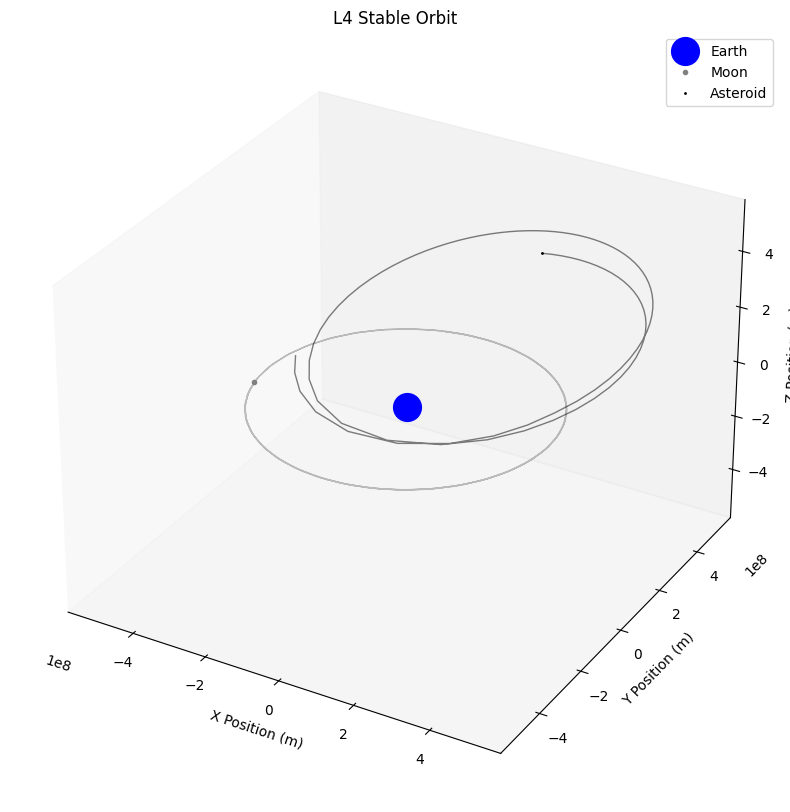

In [4]:
animation = ThreeBodyAnimation(
    load_animate_data("L4_asteroide", skip_steps=3),
    title="L4 Stable Orbit",
    body_names=['Earth', 'Moon', 'Asteroid'],
    colors=['blue', 'gray', 'black'],    
    sizes=[200, 30, 10],                
    trail_length=100,                   
    interval=50                       
)

animation.animate(save=True, filename="L4_asteroide")

## **5. Análisis de Resultados**


## **6. Conclusiones**

## **7. Referencias**